# ADS Homework 4
Wednesday Session, Proffessor Stanislav Sobolevsky

Please submit this assignment to the NYU Classes 'Assignments' section by labeling the assignments with the format **'FULL_NAME - ADS_HW4.ipynb'**. 

This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TAs or Professor Sobolevsky via email or during office hours, in case you have any questions or have some difficulties following the class material.

In [1]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
#import pandas_datareader
import datetime as dt
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

## Problem 1 - Return on University Education (20 points)

Please read the following article: https://promarket.org/learning-university-pay-off/

Consider Judea Pearl's idea of the ladder of causality that was discussed in class.  Describe whether or not the study described in the article meets the standard of (a) association; (b) intervention; and (c) counterfactual.

**(a)**
Association standard is met.   
This paper refers to the correlation between school program and wage

**(b)**
Intervention standard is met. The author described the number of classes required to earn a degree accounting for the student performance in their work which lead to the wage variance

**(c)** Yes(?). The author mentioned (a little bit) about the universities which curriculum remain the same maintain the same student wages. (However, the author did not give irrefutable argument that says all other conditions are all the same.)

## Problem 2 - Markov Processes (40 points)

### Part 1 - Markov Chain Lab (20 points)

* Consider the subway rat problem discussed in class.  
* Add two tracks to the right of Track C, labeling them Track D and Track E.  
* In this situation, treat Track A as an absorbing state.  
* If the rat is on any track other than Tracks A or E, it has probability 0.5 of remaining on that track, probability 0.25 of moving left, and probability 0.25 of moving right.  
* For Track E, assume probability 0.5 of remaining on that track, and probability 0.5 of moving left.  

* Write out the matrix of Markov transition probabilities.  Iterate this matrix forward as many times as is necessary for you to determine empirically its limit.  Based on this limit, what can you say about the evolution of the system if the rat begins on Track C?  How about Track D?  Is there a general conclusion you can draw?

In [2]:
# If on Track A, Pr(stays) = 1/2 and Pr(moves to B) = 1/2
# If on Track B, Pr(stays) = 1/2, Pr(move to A) = 1/4, and Pr(moves to C) = 1/4
# If on Track C, Pr(stays) = 1/2, Pr(move to B) = 1/4, and Pr(moves to D) = 1/4
# If on Track D, Pr(stays) = 1/2, Pr(move to C) = 1/4, and Pr(moves to E) = 1/4
# If on Track E, Pr(stays) = 1/2 and Pr(moves to D) = 1/2 

In [3]:
print("A Rat in a NYC Subway Tunnel! WOW! ")
table = [[" ", "Track A", "Track B", "Track C", "Track D", "Track E"],
        ["Track A", "1/2", "1/2", "0", "0", "0"],
        ["Track B", "1/4", "1/2", "1/4", "0", "0"],
        ["Track C", "0", "1/4", "1/2", "1/4", "0"],
        ["Track D", "0", "0", "1/4", "1/2", "1/4"],
        ["Track E", "0", "0", "0", "1/2", "1/2"]]
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print()

MT = np.matrix('0.5 0.5 0 0 0 ; 0.25 0.5 0.25 0 0; 0 0.25 0.5 0.25 0; 0 0 0.25 0.5 0.25; 0 0 0 0.5 0.5')
print("As an Numpy matrix")
print(MT)

A Rat in a NYC Subway Tunnel! WOW! 
╒═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│         │ Track A │ Track B │ Track C │ Track D │ Track E │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track A │ 1/2     │ 1/2     │ 0       │ 0       │ 0       │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track B │ 1/4     │ 1/2     │ 1/4     │ 0       │ 0       │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track C │ 0       │ 1/4     │ 1/2     │ 1/4     │ 0       │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track D │ 0       │ 0       │ 1/4     │ 1/2     │ 1/4     │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track E │ 0       │ 0       │ 0       │ 1/2     │ 1/2     │
╘═════════╧═════════╧═════════╧═════════╧═════════╧═════════╛

As an Numpy matrix
[[ 0.5   0.5   0.    0.    0.  ]
 [ 0.25  0.5   0.25  0.    0.  ]
 [ 0.    0.25  0.5   0.25  0.  ]
 [ 0.    0.    0.25  0.5   0.25]
 [ 0. 

In [4]:
ratC= np.matrix('0 0 1 0 0')

In [5]:
for i in range(1, 51):
    print('Probability rat in on Track A, B, C, D or E at time t + %i' % (i))
    print(ratC * np.linalg.matrix_power(MT, i))
    print()

Probability rat in on Track A, B, C, D or E at time t + 1
[[ 0.    0.25  0.5   0.25  0.  ]]

Probability rat in on Track A, B, C, D or E at time t + 2
[[ 0.0625  0.25    0.375   0.25    0.0625]]

Probability rat in on Track A, B, C, D or E at time t + 3
[[ 0.09375  0.25     0.3125   0.25     0.09375]]

Probability rat in on Track A, B, C, D or E at time t + 4
[[ 0.109375  0.25      0.28125   0.25      0.109375]]

Probability rat in on Track A, B, C, D or E at time t + 5
[[ 0.1171875  0.25       0.265625   0.25       0.1171875]]

Probability rat in on Track A, B, C, D or E at time t + 6
[[ 0.12109375  0.25        0.2578125   0.25        0.12109375]]

Probability rat in on Track A, B, C, D or E at time t + 7
[[ 0.12304688  0.25        0.25390625  0.25        0.12304688]]

Probability rat in on Track A, B, C, D or E at time t + 8
[[ 0.12402344  0.25        0.25195312  0.25        0.12402344]]

Probability rat in on Track A, B, C, D or E at time t + 9
[[ 0.12451172  0.25        0.25097656 

In [6]:
ratD= np.matrix('0 0 0 1 0')

In [73]:
for i in range(1, 191):
    print('Probability rat in on Track A, B, C, D or E at time t + %i' % (i))
    print(ratD * np.linalg.matrix_power(MT, i))
    print()

Probability rat in on Track A, B, C, D or E at time t + 1
[[ 0.    0.    0.25  0.5   0.25]]

Probability rat in on Track A, B, C, D or E at time t + 2
[[ 0.      0.0625  0.25    0.4375  0.25  ]]

Probability rat in on Track A, B, C, D or E at time t + 3
[[ 0.015625  0.09375   0.25      0.40625   0.234375]]

Probability rat in on Track A, B, C, D or E at time t + 4
[[ 0.03125    0.1171875  0.25       0.3828125  0.21875  ]]

Probability rat in on Track A, B, C, D or E at time t + 5
[[ 0.04492188  0.13671875  0.25        0.36328125  0.20507812]]

Probability rat in on Track A, B, C, D or E at time t + 6
[[ 0.05664062  0.15332031  0.25        0.34667969  0.19335938]]

Probability rat in on Track A, B, C, D or E at time t + 7
[[ 0.06665039  0.16748047  0.25        0.33251953  0.18334961]]

Probability rat in on Track A, B, C, D or E at time t + 8
[[ 0.07519531  0.17956543  0.25        0.32043457  0.17480469]]

Probability rat in on Track A, B, C, D or E at time t + 9
[[ 0.08248901  0.189880

# the probability rat in on track A/B/C/D/E in the long run could be （and will stablized at）0.125, 0.25, 0.25, 0.25, 0.125 

### Part 2 - Real-world example (20 points)

Similar to the example of a rat moving between subway tracks, let's dig into an example of people moving throughout a subset of 5 Brooklyn Neighborhoods to understand Markov Processes. 
<br><br>
Assumptions made here are that total population is static (i.e. no new entrants or people moving outside of this subset of neighborhoods), and that there's a 40% chance that people stay in their current neighborhood (which can be interpreted as either not moving or moving very close by) and a known probability of moving from one neighborhood to another (these are defined in the code below), with preference shown for bordering neighborhoods. 
<br><br>
We will load geo-data and filter to the specified Brooklyn neighborhoods. We will then examine movement between neighborhoods as a Markov Process, iterating until an equilibrium becomes apparent (hint: you should not see any absorbing states in this example), then visualize and interpret the results.

**a)**: Go through the below example, completing the code where marked. In the end, your dataframe should look similar to the output. (15 points)

In [8]:
import imageio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import time
from IPython.display import HTML

sns.set_style('white')
# filters to apply to the data
county = 'Kings'
hoods  = ['Downtown', 'DUMBO', 'Fort Greene', 'Boerum Hill', 'Clinton Hill']

def get_neighborhoods(file, county=county, neighborhoods=hoods):
    '''
    reads in geopandas file from Zillow, returns geodataframe with specified neighborhoods
    '''
    # read in the geodata file ('file') and consolidate to the 5 selected neighborhoods (listed above)
    #####your code here#####
    ny_all = gpd.read_file(file)
    ny_gdf = ny_all.loc[(ny_all['Name'].isin(hoods)) & (ny_all['County'] == 'Kings')]
   
  # locate coordinate points to plot neighborhood names
    ny_gdf['coords'] = ny_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    ny_gdf['coords'] = [coords[0] for coords in ny_gdf['coords']]
    return ny_gdf

bk_neighborhoods = get_neighborhoods('ZillowNeighborhoodsNY.shp')
bk_neighborhoods = bk_neighborhoods.sort_values('Name').reset_index(drop=True)
bk_neighborhoods

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,State,County,City,Name,RegionID,geometry,coords
0,NY,Kings,New York,Boerum Hill,272994,POLYGON ((-73.98682489707035 40.68846655576456...,"(-73.9864896425407, 40.68600290969882)"
1,NY,Kings,New York,Clinton Hill,270815,"POLYGON ((-73.9619257224787 40.69778778197278,...","(-73.96455445229091, 40.689058350724)"
2,NY,Kings,New York,DUMBO,270841,POLYGON ((-73.98446723099994 40.70646091900005...,"(-73.99003960915954, 40.703545669500045)"
3,NY,Kings,New York,Downtown,270825,POLYGON ((-73.98697203810939 40.70105040762233...,"(-73.98678098579373, 40.693458468711725)"
4,NY,Kings,New York,Fort Greene,273766,POLYGON ((-73.98230754099966 40.70227250100029...,"(-73.97573066517539, 40.69136863239475)"


Above we can see the geodataframe. Now let's plot it: 

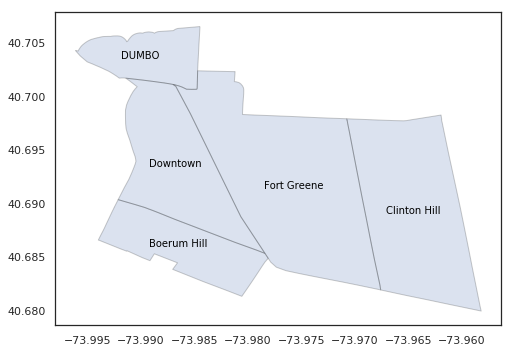

In [9]:
bk_neighborhoods.plot(figsize=(8, 6), edgecolor='black', alpha=0.2)

for idx, row in bk_neighborhoods.iterrows():
    plt.annotate(s=row['Name'], xy=row['coords'], color='Black', horizontalalignment='center', size=10)

Here, we define the likelihoods of moving from one neighborhood to another.
Use a Dirichlet Distrobution (convenient for generating samples that sum to 1.0) to obtain an initial starting population for the neighborhoods https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.dirichlet.html

In [11]:
np.random.seed(42)
data = np.matrix(np.random.dirichlet(np.ones(5), size = 1))
#use a distribution to create a 1-by-5 matrix of values that sum to 1.0 

initial_vals = zip(list(bk_neighborhoods.Name), np.array(data)[0])

print('Initial allocations:')
print('--------------------')
for i, j in initial_vals:
    print('{:<13s} {:>5.2f}%'.format(i, round(j, 4)*100))
print('--------------------')
print()

move_likelihoods = np.matrix('0.4 0.1 0.1 0.2 0.2; 0.1 0.4 0.1 0.15 0.25; 0.1 0.1 0.4 0.2 0.2;' 
                             + '0.2 0.05 0.15 0.4 0.2; 0.15 0.2 0.05 0.2 0.4')
pd.DataFrame(data=move_likelihoods, index=bk_neighborhoods.Name, columns=bk_neighborhoods.Name) 
# we could use 'tabulate' here, as this is for visualization purposes, but a pd dataframe is 
# often just as clear and has more compatability with python environments

Initial allocations:
--------------------
Boerum Hill    7.98%
Clinton Hill  51.20%
DUMBO         22.40%
Downtown      15.53%
Fort Greene    2.89%
--------------------



Name,Boerum Hill,Clinton Hill,DUMBO,Downtown,Fort Greene
Name,,,,,
Boerum Hill,0.40,0.10,0.10,0.20,0.20
Clinton Hill,0.10,0.40,0.10,0.15,0.25
DUMBO,0.10,0.10,0.40,0.20,0.20
Downtown,0.20,0.05,0.15,0.40,0.20
Fort Greene,0.15,0.20,0.05,0.20,0.40


Here we will build a Markov process and visualize it in a GIF; this is useful for seeing equilibrium state reached over time. We will then look at the numbers to confirm what the plot is showing us. 

In [12]:
years = 7
pct_by_year = []

def plot_neighborhood_movement(years):

    pct_in_hood = data * np.linalg.matrix_power(move_likelihoods, years)
    #####your code here##### 
    # use the matrix_power function to run a step in the markov process
    bk_neighborhoods['pct_in_hood'] = np.array(pct_in_hood)[0]
    pct_by_year.append(np.array(pct_in_hood)[0])
    vmin, vmax = bk_neighborhoods['pct_in_hood'].min(), bk_neighborhoods['pct_in_hood'].max()

    fig, ax = plt.subplots(figsize=(8,6))
    base = bk_neighborhoods.plot(ax=ax, column='pct_in_hood', edgecolor='grey', 
                                cmap='Blues', vmin=vmin, vmax=vmax, legend=False)

    plt.title('Year:{}'.format(years), size=16)
    
    for idx, row in bk_neighborhoods.iterrows():
        #####your code here##### 
        # put neighborhood names on the plot in red font
        plt.annotate(row['Name'], xy = row['coords'], color = 'r')

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('neighborhood_movement.gif', [plot_neighborhood_movement(year) for year in range(years)], fps=1)

HTML('<img src="neighborhood_movement.gif">')

In [74]:
year100 = 100
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('neighborhood_movement100.gif', [plot_neighborhood_movement(year) for year in range(year100)], fps=1)

HTML('<img src="neighborhood_movement100.gif">')

**b)**: Interpret the results - what trends do we notice towards the end of the GIF? Why might this be? What would we expect if we ran this over 100 iterations (feel free to try this)? (5 points)

**The results of 7 and 100 year change are shown above. We could see that the images remain the same after the 5th year which indicates the likelihood remain the same at that time no matter  what the initial allocation is.**  

This is some pretty cool stuff! If you had enough data, you could theoretically do this for all of NYC (you'd additionally have to factor in people moving into and out of the city, but that's not too hard). Further, you might change the percentages over time (e.g. when the L-train shuts down, you may want to lower the % of people moving to Williamsburg in your model). 

## Problem 3 - Time Series (40 points)

This dataset looks at measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years; the data is initially messy, and will take a lot of cleaning. You will find that there is some correlation between the data (i.e. what we know about the current state can tell us something about the future state), and you will then construct an Autoregressive Model to predict future values.

Source: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

Variable Descriptions:
1. date: Date in format dd/mm/yyyy <br> 
2. time: time in format hh:mm:ss <br>
3. global_active_power: household global minute-averaged active power (in kilowatt) <br>
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt) <br>

In [13]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR

sns.set_style('darkgrid')
%matplotlib inline

### Part 1: Reading Data (15 points)
Read in the data. It is in a .txt file, but you can read it in with 'pd.read_csv()' - you may want to consider the  'sep', 'parse_dates', 'usecols', 'infer_datetime_format', 'keep_default_na', 'skip_blank_lines', 'skiprows', and 'dtype' arguements in the function call. 
<br><br>
You also may want to use the 'nrows' arguement or use a limited version of the dataset as you adjust these, as it is a large one. 
<br><br>
Use the column names = ['Date', 'Global_active_power', 'Global_reactive_power']
(15 points)

In [ ]:
pwr = pd.read_csv('household_power_consumption.txt', sep = ';')
#####your code here#####

# , dtype = {'Global_active_power': np.float64, 'Global_reactive_power': np.float64}
name = ['Date', 'Global_active_power','Global_reactive_power']
pwr_consumption = pd.DataFrame(pwr, columns = name) 
pwr_consumption['Global_active_power'] = pwr_consumption['Global_active_power'].convert_objects(convert_numeric = True)
pwr_consumption['Global_reactive_power'] = pwr_consumption['Global_reactive_power'].convert_objects(convert_numeric = True)
pwr_consumption['Date'] = pd.to_datetime(pwr_consumption['Date'])
pwr_consumption['Global_reactive_power'] = pwr_consumption['Global_reactive_power'].convert_objects(convert_numeric = True)
pwr_consumption.head()
#####your code here##### 
# group the newly-cleaned data by data  using the .sum() function to aggregate

In [75]:
pwr_grouped = pwr_consumption.groupby(['Date']).sum().sort_values('Date')
pwr_grouped.head()

,Global_active_power,Global_reactive_power
Date,,
2006-12-16,1209.176,34.922
2006-12-17,3390.460,226.006
2006-12-18,2203.826,161.792
2006-12-19,1666.194,150.942
2006-12-20,2225.748,160.998


### Part 2: Visualizing Time-Series (10 points)
Plot data for 'global_active_pwr' and 'global_reactive_pwr' on a time-series. In addition to a standard line plot, also generate a plot using lag_plot() function to examine the correlation. So, your output should have 4 plots. Describe your findings.
<br><br>
Make a function that takes 2 arguments (you may use additional) - a plotting function & data containing the 2 required columns (global_active_pwr, global_reactive_pwr) and then generates the plot specified.
<br><br>
Make sure the plots have a title and the axes are labelled. (10 points)

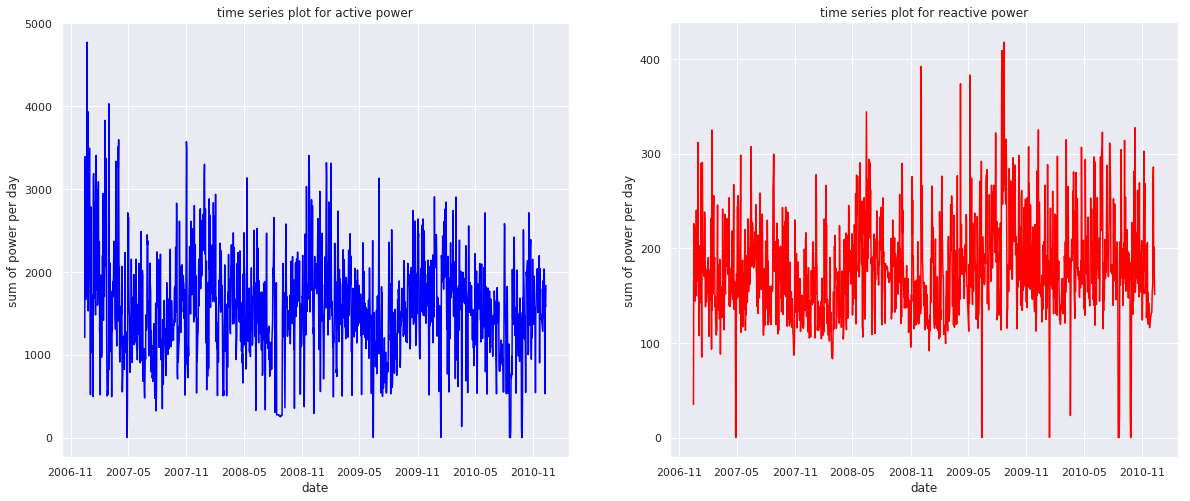

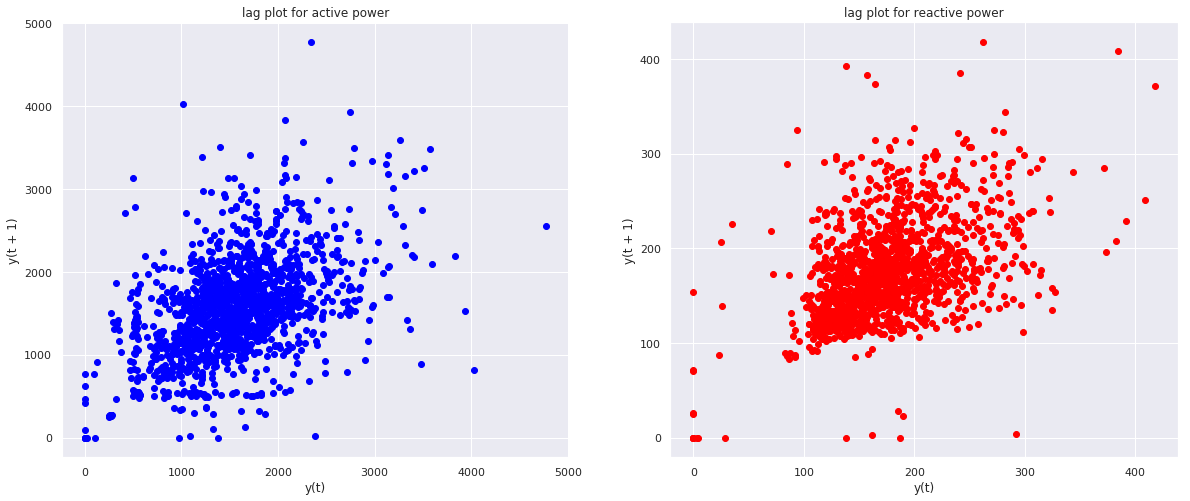

In [49]:
glb_active_pwr   = pwr_grouped[['Global_active_power']]
glb_reactive_pwr = pwr_grouped[['Global_reactive_power']]
glb_active_pwr = pd.Series(glb_active_pwr['Global_active_power'], index = glb_active_pwr.index)
glb_reactive_pwr = pd.Series(glb_reactive_pwr['Global_reactive_power'], index = glb_reactive_pwr.index)
#glb_active_pwr
def time_series_plotting(func, series1, series2, *args):
    """
    takes plotting function, 2 time-series and additional arguments (if required)
    """
    
    #####your code here#####
    fig = plt.figure(figsize = (20,8))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    if func == 'line':
        ax1.plot(glb_active_pwr, color = 'blue')
        ax1.set_title('time series plot for active power')
        ax1.set_ylabel('sum of power per day')
        ax1.set_xlabel('date')
        
        ax2.plot(glb_reactive_pwr, color = 'red')
        ax2.set_title('time series plot for reactive power')
        ax2.set_ylabel('sum of power per day')
        ax2.set_xlabel('date')
        
    if func == 'lag':
        lag_plot(glb_active_pwr, ax = ax1, c = 'blue')
        lag_plot(glb_reactive_pwr, ax = ax2, c = 'red')
        ax1.set_title('lag plot for active power')
        ax2.set_title('lag plot for reactive power')
        
    else:
        return ('please choose from line or lag')

time_series_plotting('line', glb_active_pwr, glb_reactive_pwr)
time_series_plotting('lag', glb_active_pwr, glb_reactive_pwr)

(Describe your findings here)

The active power and reactive power plots show the undulatory trends and their peak and valley are reversely corresponding. To be specific, at the time when it is a peak in active power, there is a vally in reactive power. For the lag plot, although they have different axis labels, the trends are very similar(strong positive).

### Part 3: Time-Series Forecasting using AR(1) (15 points)
Fit an autoregressive model to the data, and use it to make predictions over the next 30 days of useage (defined by creating a test set from the last 30 days of available data). 
1. Perform a train-test split on time-series data. Explain why random sampling isn't the best option for time-series. 
2. Fit AR(1) model
3. Predict on test set
4. Calculate Root-Mean Squared Error (RMSE) 
$$ RMSE = \frac{1}{N} \sum_{i=0}^N \sqrt{ (\hat{y}_i - y_i)^2 } $$

In [50]:
type(glb_active_pwr)


pandas.core.series.Series

Global Active Power Root-Mean Squared Error is
RMSE: 290304.002
Global Reactive Power Root-Mean Squared Error is


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE: 2917.435


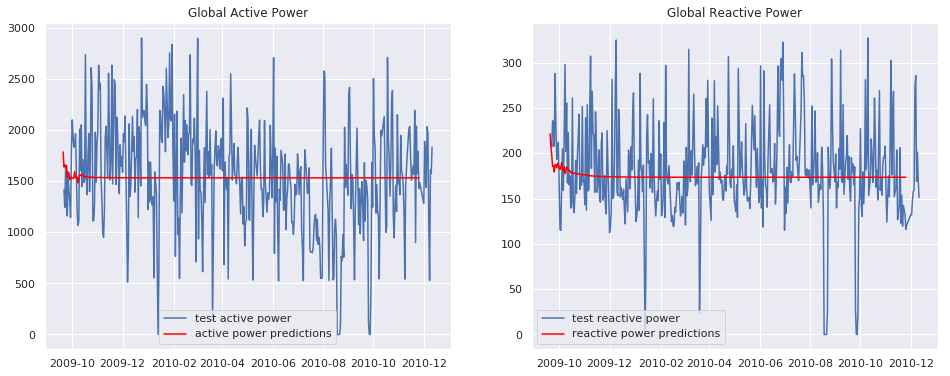

In [72]:
def fit_AR1(series):
    """
    Takes in a Time-series, splits into train and test, fits AR(1) model, predicts on the test set, calculates error
    and return the predictions and the test set for visualization
    """
    # Perform a train-test split on the dataset keeping ~70% for the training set
   # print(glb_active_pwr)
    train = series[1:int(len(series) * 0.7)]
    test = series[int(len(series) * 0.7)+1 :]
    
    #OR
    #train = series[:-30]
    #test = series[ -30:]
    # The split is not clearly stated!!!
  
        
    # Fit AR(1) model
    model = AR(train).fit()
    
    # Get the predictions in an array
    predictions = model.predict(start = len(train) , end = len(series)-3 , dynamic = False)
    
    
    # Obtain and print Root-Mean Squared Error (RMSE)
    for i in range(len(predictions)):
        RMSE = mean_squared_error(test, predictions)
    print('RMSE: %.3f' % RMSE)

    return test, predictions

print('Global Active Power Root-Mean Squared Error is')
t1, p1 = fit_AR1(glb_active_pwr)
print('Global Reactive Power Root-Mean Squared Error is')
t2, p2 = fit_AR1(glb_reactive_pwr)

fig, ax = plt.subplots(2, figsize=(16,6))

plt.subplot(121)
# Visualize actual values vs predicted values for 'Global Active Power'
#####your code here####
plt.title('Global Active Power')
plt.plot(t1, label='test active power')
plt.plot(p1, color='red', label='active power predictions')
plt.legend()

plt.subplot(122)
# Visualize actual values vs predicted values for 'Global Reactive Power'
#####your code here#####
plt.title('Global Reactive Power')
plt.plot(t2, label='test reactive power')
plt.plot(p2, color='red', label='reactive power predictions')
plt.legend()


plt.show()

(Reasoning for train-test split here)

The train data is the first 70% of the original data, the test data is the last 30%. The main idea for this split is to use the trend of train data to predict the last 30% of the data and compare the prediction with the real data.

(Describe your findings here)

It could see that this prediction is not good. The RMSE value for both active and reactive power are very high which indicate the poor prediction quality. 